# IGOR VOIGT FUNCITON WRAPPING

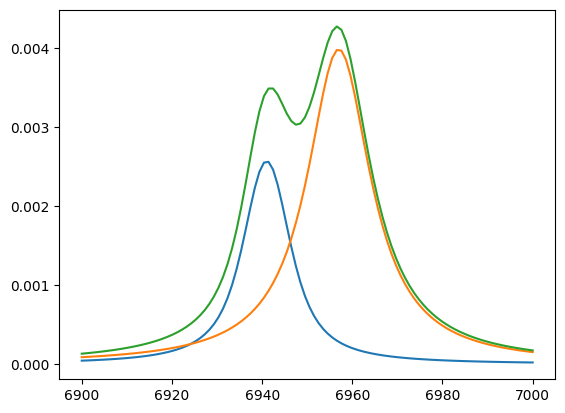

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import wofz

def voigt_func(x, shape_factor):
    """
    Computes the Voigt function as the real part of the Faddeeva function.
    :param x: Input wave (numpy array)
    :param shape_factor: Determines the Gaussian-Lorentzian mix.
    :return: Voigt peak values.
    """
    return np.real(wofz(x + 1j * shape_factor))

def mpfx_voigt_peak(cw, xw):
    """
    Computes a Voigt peak function and fills yw with computed values.
    :param cw: Coefficient wave (array-like of length 4)
               cw[0]: Peak location
               cw[1]: Width-affecting factor
               cw[2]: Amplitude factor
               cw[3]: Shape factor (0 = Gaussian, Inf = Lorentzian, sqrt(ln(2)) = 50/50)
    :param xw: X values where the function is evaluated
    :return: 0 if successful, NaN if input is invalid
    """
    try:
        # Validate input
        cw = np.asarray(cw, dtype=np.float64)
        xw = np.asarray(xw, dtype=np.float64)
        if len(cw) != 4 or yw.shape != xw.shape:
            return np.nan
        
        # Compute the Voigt peak values
        return cw[2] * voigt_func(cw[1] * (xw - cw[0]), cw[3])
        
    except Exception:
        return np.nan  # Return NaN on failure

# Example usage
cw = np.array([6941, .3, .008, 1.5])  # Example coefficients
xw = np.linspace(6900, 7000, 100)  # X values
yw = np.zeros(100)  # Output array
yw = mpfx_voigt_peak(cw, xw)

cw = np.array([6957, 2078.3, 126.18, 17841])  # Example coefficients
yyw = mpfx_voigt_peak(cw, xw)

plt.plot(xw, yw, xw, yyw, xw, yw + yyw)